<a href="https://colab.research.google.com/github/muhammadahmadr1zwan/PlaneCrashDataAnalysisProject/blob/main/PlaneCrashDataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
library(data.table)
myDF <- fread("/content/commercialairplanecrashes.csv", header = TRUE)
tail(myDF)

Month,Day,Year,Full Date,Airline,Aircraft Type,Location,City,Country,Country GDP per Capita,Fatalities,Cause of Crash,Cause Abbreviation,Details
<int>,<int>,<int>,<IDate>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,8,2024,2024-01-08,Alaska Airlines,Boeing 737 MAX 9,"Portland, OR, USA",Portland,USA,86601,0,Uncontrolled decompression,UD,The aircraft safely returned to Portland after a plug covering an unused exit door blew out mid-flight.
5,21,2024,2024-05-21,Singapore Airlines,Boeing 777-300ER,"Bangkok, Thailand",Bangkok,Thailand,7500,1,Severe turbulence,ST,The aircraft encountered severe turbulence en route from London to Singapore and made an emergency landing in Bangkok.
7,24,2024,2024-07-24,Saurya Airlines,Bombardier CRJ-200ER,"Kathmandu, Nepal",Kathmandu,Nepal,1490,18,Takeoff error,TE,The aircraft crashed shortly after takeoff on its way to Pokhara International Airport.
8,9,2024,2024-08-09,Voepass,ATR-72-500,"Vinhedo, São Paulo, Brazil",Vinhedo,Brazil,11350,62,Aircraft entered a flat spin,FS,The plane crashed into a residential area during descent.
12,25,2024,2024-12-25,Azerbaijan Airlines,Embraer 190AR,"Aktau, Kazakhstan",Aktau,Kazakhstan,14780,38,Emergency landing failure,LF,The aircraft crashed in a field during an attempted emergency landing.
12,29,2024,2024-12-29,Jeju Air,Boeing 737-800,"Muan, South Korea",Muan,South Korea,36132,179,Pilot landing error,LE,"The aircraft crashed into an embankment while attempting to land, making it the deadliest aviation accident on South Korean soil."


In [4]:
table(myDF$`Cause of Crash`)


Aircraft entered a flat spin                 Cargo issues 
                           1                            1 
   Emergency landing failure        Firefighting accident 
                           1                            1 
                Inconclusive        Landing gear collapse 
                           1                            1 
    Lost control of aircraft             Mechanical error 
                           1                            3 
         Pilot landing error              Plane shot down 
                           8                            2 
Poor weather and pilot error            Severe turbulence 
                           1                            1 
               Takeoff error   Uncontrolled decompression 
                           2                            1 
          Weather conditions 
                           4 

In [5]:
table(myDF$`Cause Abbreviation`)
# CI = Cargo Issues
# FA = Firefighting accident
# FS = Aircraft entered a flat spin
# GC = Landing gear collapse
# IN = Inconclusive
# LC = Lost control of aircraft
# LE = Pilot Landing error
# LF = Emergency landing failure
# ME = Mechanical error
# PP = Poor weather and pilot error
# SD = Plane shot down
# ST = Severe turbulence
# TE = Takeoff error
# UD = Uncontrolled decompression
# WC = Weather conditions


CI FA FS GC IN LC LE LF ME PP SD ST TE UD WC 
 1  1  1  1  1  1  8  1  3  1  2  1  2  1  4 

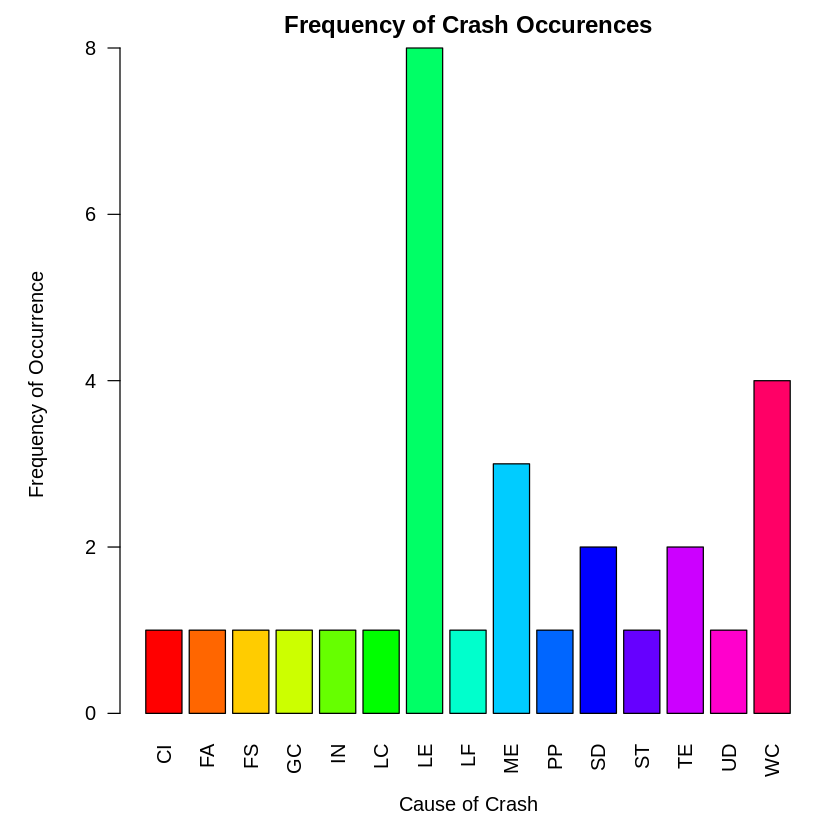

In [6]:
par(mar = c(5, 5, 2, 1))

colors <- rainbow(length(table(myDF$`Cause Abbreviation`))) # Makes the  barplot color rainbow

barplot(table(myDF$`Cause Abbreviation`),
  main = "Frequency of Crash Occurences", xlab = "Cause of Crash",
  ylab = "Frequency of Occurrence", col = colors, las = 2)


# CI = Cargo Issues
# FA = Firefighting accident
# FS = Aircraft entered a flat spin
# GC = Landing gear collapse
# IN = Inconclusive
# LC = Lost control of aircraft
# LE = Pilot Landing error
# LF = Emergency landing failure
# ME = Mechanical error
# PP = Poor weather and pilot error
# SD = Plane shot down
# ST = Severe turbulence
# TE = Takeoff error
# UD = Uncontrolled decompression
# WC = Weather conditions

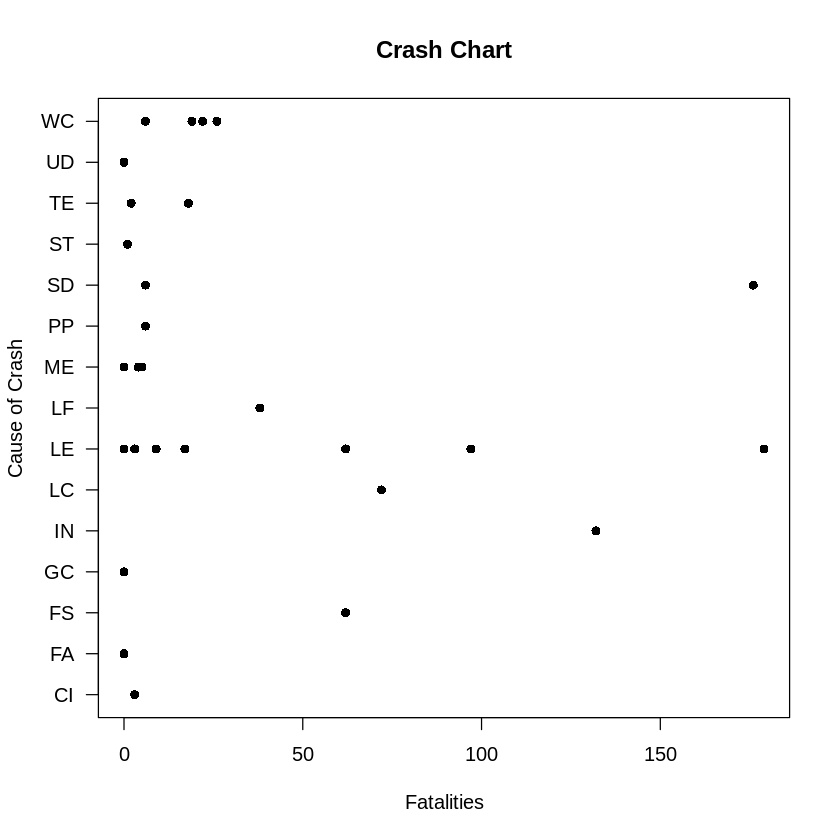

In [7]:
# Index for each Cause Abbreviation
myDF$CauseIndex <- as.numeric(factor(myDF$`Cause Abbreviation`))

plot(
  myDF$Fatalities, myDF$CauseIndex,
  xlab = "Fatalities", ylab = "Cause of Crash", main = "Crash Chart",
  pch = 16, col = "black", xaxt = "n", yaxt = "n")

# Unique labels on y-axis
axis(2, at = unique(myDF$CauseIndex), labels = unique(myDF$`Cause Abbreviation`), las = 2)

axis(1)



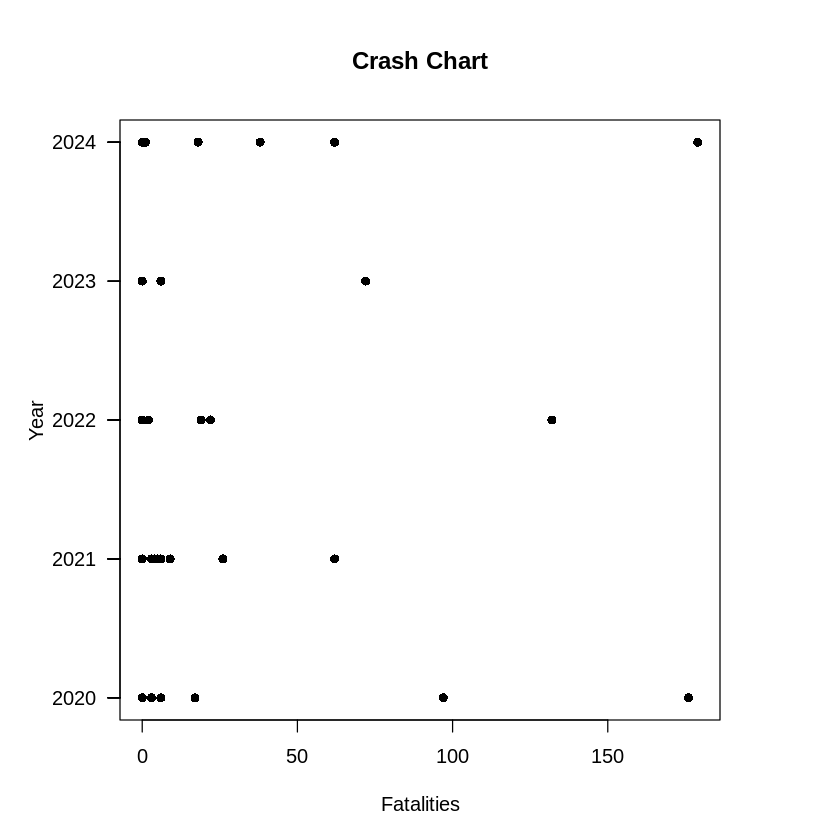

In [8]:
# Index for each year
par(mar = c(5, 5, 5, 5))
myDF$YearIndex <- as.numeric(factor(myDF$Year))

plot(
  myDF$Fatalities, myDF$YearIndex,
  xlab = "Fatalities", ylab = "Year", main = "Crash Chart",
  pch = 16, col = "black", xaxt = "n", yaxt = "n")

# Unique labels on y-axis
axis(2, at = myDF$YearIndex, labels = myDF$Year, las = 2)

axis(1)


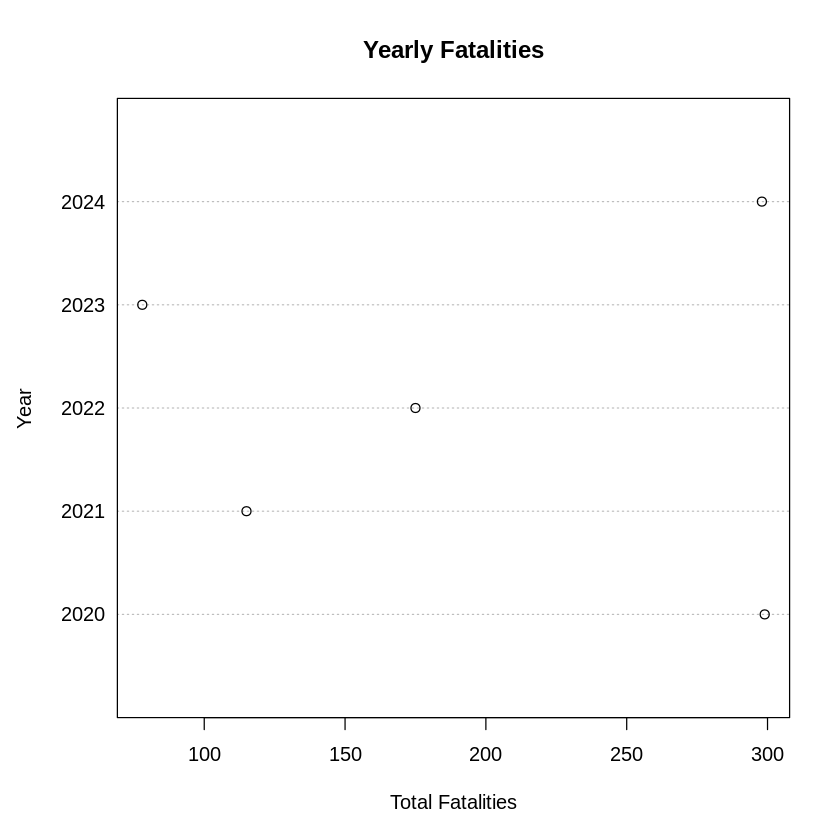

In [9]:
# Adds fatalities by year
aggregated_data <- aggregate(Fatalities ~ Year, data = myDF, sum)

dotchart(aggregated_data$Fatalities,
         labels = aggregated_data$Year, main = "Yearly Fatalities",
         xlab = "Total Fatalities", ylab = "Year", col = "black")


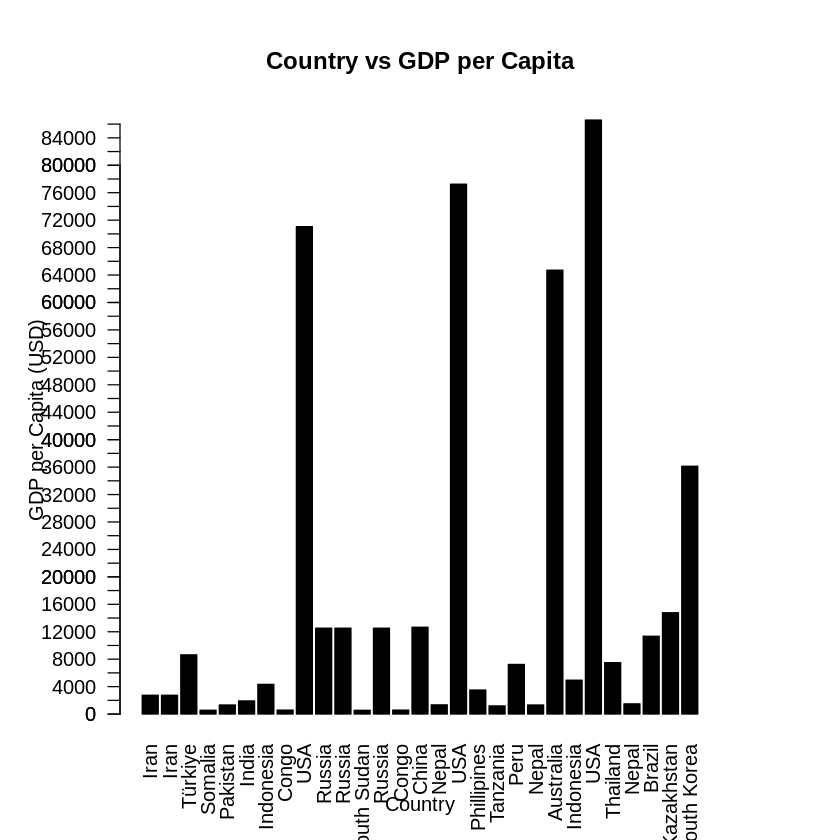

In [10]:
par(mar = c(5, 5, 5, 5))
barplot(
  myDF$`Country GDP per Capita`, names.arg = myDF$Country,
  las = 2, col = "black", main = "Country vs GDP per Capita",
  xlab = "Country", ylab = "GDP per Capita (USD)")

# Custom y-axis to include specific values
axis(2, at = seq(0, max(myDF$`Country GDP per Capita`), by = 2000), las = 1)

# 82.7% of commercial airplane crashes occured in countries with a GDP per Capita of less than 20,000 US Dollars.
# 62% of commercial airplane crashes occured in countries with a GDP per Capita of less than 10,000 US Dollars.
# 51.7% of commercial airplane crashes occured in countries with a GDP per Capita of less than 5,000 US Dollars.